# SMC & edu TSYP 11 challenge
# Step 1:Data Cleaning

In [1]:
from __future__ import division
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #1: Loading data

In [2]:
# read in dataset as DataFrame
HMS = pd.read_csv('HMS_2022-2023_PUBLIC_instchars.csv')

In [3]:
# replace Excel NULL's with Python NaN's
HMS = HMS.replace(['#NULL!'], [np.NaN])

## STEP #2: Conduct high-level diagnostics

In [4]:
HMS.head() # all good here
HMS.tail() # identified missing values

,responseid,age,sex_birth,gender_male,gender_female,gender_transm,gender_transf,gender_queer,gender_nonbin,gender_prefnoresp,...,schoolnum,inst_survey,inst_hmsyear,inst_size,inst_type,inst_public,inst_geo,inst_specart,inst_speccc,inst_gradrate
76401,R_3ndW8O9VndIRTCR,20.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,135,HMS Winter 2023,2022-2023,3,4,1,1,0,0,0.6
76402,R_cCOnb8XFcwXywRb,24.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,135,HMS Winter 2023,2022-2023,3,4,1,1,0,0,0.6
76403,R_BFkePrAy6BwEhnb,22.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,135,HMS Winter 2023,2022-2023,3,4,1,1,0,0,0.6
76404,R_1GDeZTjezutZn9V,22.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,135,HMS Winter 2023,2022-2023,3,4,1,1,0,0,0.6
76405,R_2tA0WR1TdIcN5cT,43.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,135,HMS Winter 2023,2022-2023,3,4,1,1,0,0,0.6


In [5]:
HMS.inst_survey.value_counts(dropna = False)

HMS Winter 2023    44556
HMS Fall 2022      31850
Name: inst_survey, dtype: int64

In [6]:
nan_values = HMS['inst_survey'].isnull().sum()
print(f"Number of NaN values in 'inst_survey' column: {nan_values}")

Number of NaN values in 'inst_survey' column: 0


In [7]:
HMS.shape # 76406 students x 1620 variables

(76406, 1620)

In [8]:
HMS.info(null_counts = True) # identified dtype issues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76406 entries, 0 to 76405
Columns: 1620 entries, responseid to inst_gradrate
dtypes: float64(1325), int64(7), object(288)
memory usage: 944.3+ MB


In [9]:
HMS.describe(include = 'all') # investigated dtype issues

,responseid,age,sex_birth,gender_male,gender_female,gender_transm,gender_transf,gender_queer,gender_nonbin,gender_prefnoresp,...,schoolnum,inst_survey,inst_hmsyear,inst_size,inst_type,inst_public,inst_geo,inst_specart,inst_speccc,inst_gradrate
count,76406,76406.000000,76262.000000,19838.0,52822.0,643.0,228.0,1626.0,2530.0,502.0,...,76406.000000,76406,76406,76406.000000,76406.000000,76406.000000,76406.000000,76406.000000,76406.000000,76406.000000
unique,76406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,R_1LtWaWrb0mkAEbG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,HMS Winter 2023,2022-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,44556,76406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23.282995,1.267158,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,72.447583,NaN,NaN,3.581198,2.790291,0.620095,3.863453,0.003102,0.122804,0.642110
std,NaN,7.192166,0.444046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.687371,NaN,NaN,1.156696,0.917932,0.485366,2.525950,0.055608,0.328215,0.211715
min,NaN,18.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.066000
25%,NaN,19.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,38.000000,NaN,NaN,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.551000
50%,NaN,21.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,76.000000,NaN,NaN,4.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.670000
75%,NaN,24.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,102.000000,NaN,NaN,5.000000,3.000000,1.000000,5.000000,0.000000,0.000000,0.820000


## STEP #3: Clean data

### 1) check for duplicate rows

In [10]:
print('no duplicate rows!') if not any(HMS.duplicated()) else 'duplicates present!'

no duplicate rows!


### 2) address missing values

In [11]:
# remove students who didn't complete the survey
HMS = HMS[pd.notnull(HMS['inst_survey'])]

In [12]:
# remove students who has more than 90% missing responses

threshold = 90

num_high_nan_individuals = (HMS.isna().mean(axis=1) * 100 > threshold).sum()
num_high_nan_individuals

9003

In [13]:
rows_to_drop = HMS[HMS.isna().mean(axis=1) * 100 > threshold].index
HMS.drop(index=rows_to_drop, inplace=True)

num_high = (HMS.isna().mean(axis=1) * 100 > threshold).sum()
num_high

0

In [14]:
HMS.shape # 67403 students x 1620 variables

(67403, 1620)

### 3) Data encoding : convert datatypes

In [15]:
# BEFORE: nearly all 'object' datatypes
HMS.dtypes.value_counts()

float64    1325
object      288
int64         7
dtype: int64

In [16]:
# DURING: convert all *non-string* columns to a 'numeric' datatype
HMS = HMS.apply(pd.to_numeric, errors = 'ignore')

In [17]:
# AFTER: nearly all 'float64' datatypes
HMS.dtypes.value_counts()

float64    1537
object       76
int64         7
dtype: int64

## STEP #4: Check for outliers

### survey type

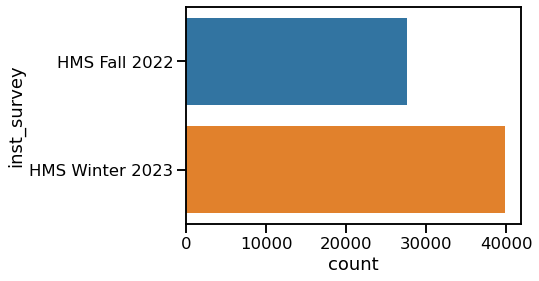

In [18]:
sns.countplot(y = 'inst_survey', data= HMS); # seems normal

### schoolnum respondents

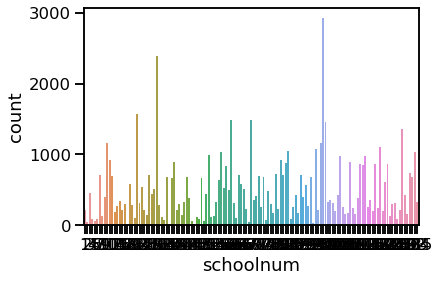

In [19]:
sns.countplot(x = 'schoolnum', data = HMS); # interesting distribution as it showes how 

### => The varied distribution among different schools highlights the diversity in responses, suggesting a rich dataset encompassing multiple educational institutions. This diversity in responses is instrumental in enhancing the depth and quality of our analysis, allowing us to capture a broader perspective and draw more comprehensive conclusions.

### age

In [20]:
# remove decimal or 0-value ages
for idx, age in enumerate(HMS.age):
    if (not age.is_integer()) or (age == 0):
        HMS.age = HMS.age.drop([idx])
        print('removed:',age)

removed: 19.5


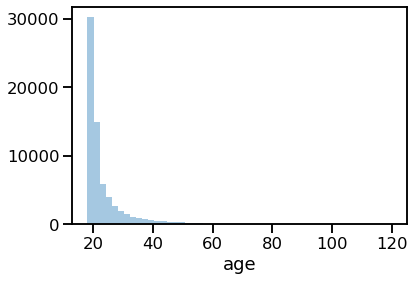

In [21]:
# plot histograpm of age distribution
ageForPlot = pd.to_numeric(HMS.age).dropna()
sns.distplot(ageForPlot, kde = False);

In [22]:
# check oldest reported ages
ageForPlot.nlargest(n=8)

60242    120.0
7311     100.0
16106     99.0
38308     99.0
55681     99.0
26804     80.0
26723     77.0
36098     77.0
Name: age, dtype: float64

In [23]:
# check percentage of older age groups
print('percent over 25 years old:', len(HMS[HMS['age'] > 25])/len(HMS.age))
print('percent over 30 years old:', len(HMS[HMS['age'] > 30])/len(HMS.age))
print('percent over 35 years old:', len(HMS[HMS['age'] > 35])/len(HMS.age))

percent over 25 years old: 0.21169680874738514
percent over 30 years old: 0.11597406643621204
percent over 35 years old: 0.0697001617138703


### <span style="color:red">NOTE: We decided to remove respondents over 30 years old (as outliers)</span>

In [24]:
# remove participants over 30 years old
HMS = HMS[HMS['age'] < 30]

### sex_birth

In [25]:
unique_sec_birth = HMS['sex_birth'].unique()
print(unique_sec_birth)
#=>1=Female 2=Male 3=Intersex

[ 1.  2. nan  3.]


In [26]:
# Calculate the percentage of each unique value in 'sec_birth'
percentage_sec_birth = (HMS['sex_birth'].value_counts(normalize=True) * 100).reset_index()
percentage_sec_birth.columns = ['sex_birth', 'Percentage']

print(percentage_sec_birth)


   sex_birth  Percentage
0        1.0   73.483246
1        2.0   26.455333
2        3.0    0.061421


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

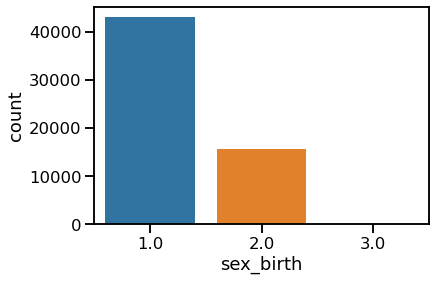

In [27]:
ax = sns.countplot(x = 'sex_birth', data = HMS);
ax.set_xticklabels(['Male', 'Female']);

# <span style="color:red">NOTE: We decided to intersex respondents (as outliers)</span>

In [28]:
HMS = HMS[HMS['sex_birth'] != 3.0]

### sexuality

In [29]:
# List of columns related to sexuality
sexuality_columns = [
    'sexual_h', 'sexual_l', 'sexual_g', 'sexual_bi', 'sexual_queer',
    'sexual_quest', 'sexual_asexual', 'sexual_pan', 'sexual_prefnoresp', 'sexual_selfid'
]

# Define conditions and choices for np.select()
conditions = [HMS[col] == 1 for col in sexuality_columns]
choices = [col.split('_')[1] for col in sexuality_columns]

# Create 'sexual' column based on conditions and choices
HMS['sexual'] = np.select(conditions, choices, np.nan)

In [30]:
unique_sec_birth = HMS['sexual'].unique()
print(unique_sec_birth)

['h' 'pan' 'bi' 'quest' 'selfid' 'l' 'queer' 'prefnoresp' 'asexual' 'g'
 'nan']


In [31]:
# Calculate the percentage of NaN values in the 'sexual' column
percentage_nan_sexual = (HMS['sexual'].isnull().mean()) * 100
print(f"Percentage of NaN values in 'sexual' column: {percentage_nan_sexual:.2f}%")


Percentage of NaN values in 'sexual' column: 0.00%


In [32]:
# Drop rows where 'sexual' column has NaN values
HMS.dropna(subset=['sexual'], inplace=True)

In [33]:
# Replace 'nan' values in the 'sexual' column with 'Unknown'
HMS['sexual'].replace('nan', 'Other', inplace=True)


In [34]:
unique_sec_birth = HMS['sexual'].unique()
print(unique_sec_birth)

['h' 'pan' 'bi' 'quest' 'selfid' 'l' 'queer' 'prefnoresp' 'asexual' 'g'
 'Other']


In [35]:
['h' 'pan' 'bi' 'quest' 'selfid' 'l' 'queer' 'prefnoresp' 'asexual' 'g'
 'Other']
# Define a dictionary to map the values
sexuality_mapping = {
    'h': 'Heterosexual',
    'l': 'Lesbian',
    'g': 'Gay',
    'bi': 'Bisexual',
    'queer': 'Queer',
    'quest': 'Questioning',
    'selfid': 'Self-identified',
    'asexual': 'Asexual',
    'pan': 'Pansexual',
    'prefnoresp': 'PreferNotToRespond',
    'Other': 'Other'
}

# Map values in the 'sexual' column using the dictionary
HMS['sexual'] = HMS['sexual'].map(sexuality_mapping)


unique_sec_birth = HMS['sexual'].unique()
print(unique_sec_birth)

['Heterosexual' 'Pansexual' 'Bisexual' 'Questioning' 'Self-identified'
 'Lesbian' 'Queer' 'PreferNotToRespond' 'Asexual' 'Gay' 'Other']


In [36]:
#drop the old columns related to sexuality:
columns_to_drop = sexuality_columns

# Drop the specified columns from the DataFrame
HMS.drop(columns=columns_to_drop, inplace=True)
HMS.head()

,responseid,age,sex_birth,gender_male,gender_female,gender_transm,gender_transf,gender_queer,gender_nonbin,gender_prefnoresp,...,inst_survey,inst_hmsyear,inst_size,inst_type,inst_public,inst_geo,inst_specart,inst_speccc,inst_gradrate,sexual
0,R_305XFCxIAD4Adso,21.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,HMS Fall 2022,2022-2023,2,4,0,1,0,0,0.44,Heterosexual
3,R_1jlU5T3wBavUQmp,24.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,HMS Fall 2022,2022-2023,2,4,0,1,0,0,0.44,Heterosexual
4,R_DwRSIFjs6RRlKpP,27.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,HMS Fall 2022,2022-2023,2,4,0,1,0,0,0.44,Heterosexual
5,R_2doLvQ0Wf1XBB6b,19.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,HMS Fall 2022,2022-2023,2,4,0,1,0,0,0.44,Heterosexual
6,R_003MraYFHaMRK1P,21.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,HMS Fall 2022,2022-2023,2,4,0,1,0,0,0.44,Pansexual


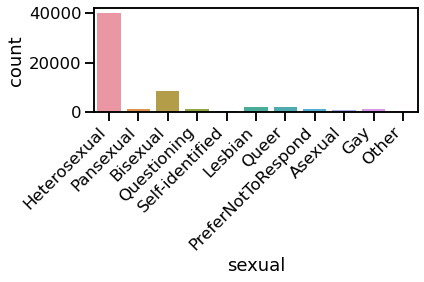

In [37]:
ax = sns.countplot(x='sexual', data=HMS)
ax.set_xticklabels(['Heterosexual', 'Pansexual', 'Bisexual', 'Questioning', 'Self-identified',
                    'Lesbian', 'Queer', 'PreferNotToRespond', 'Asexual', 'Gay', 'Other'],
                    rotation=45, ha='right')
plt.tight_layout()
plt.show()


## STEP #5: Organize data 

### 1) Extract required columns

In [38]:
# Get columns containing 'AAQ' in their names
AAQ_columns = [col for col in HMS.columns if 'aaq' in col]

# Print the columns found
print("Columns containing 'AAQ' in their names:")
print(AAQ_columns)


Columns containing 'AAQ' in their names:
['aaq_1', 'aaq_2', 'aaq_3', 'aaq_4', 'aaq_5', 'aaq_6', 'aaq_7']


In [39]:
# Display the content of the columns
AAQ_data = HMS[AAQ_columns]
print(AAQ_data)


       aaq_1  aaq_2  aaq_3  aaq_4  aaq_5  aaq_6  aaq_7
0        3.0    3.0    3.0    3.0    3.0    3.0    4.0
3        2.0    2.0    2.0    1.0    2.0    3.0    3.0
4        1.0    1.0    1.0    1.0    1.0    1.0    1.0
5        1.0    1.0    1.0    1.0    7.0    1.0    7.0
6        7.0    7.0    7.0    6.0    6.0    6.0    5.0
...      ...    ...    ...    ...    ...    ...    ...
76399    1.0    1.0    1.0    1.0    3.0    4.0    1.0
76400    2.0    1.0    1.0    1.0    2.0    2.0    1.0
76401    5.0    5.0    5.0    3.0    4.0    4.0    4.0
76402    4.0    5.0    5.0    5.0    5.0    4.0    3.0
76404    4.0    4.0    4.0    4.0    4.0    4.0    4.0

[58631 rows x 7 columns]


In [40]:
# separate out standard survey modules
HMS_ids = HMS[['schoolnum', 'responseid']]
HMS_demo = HMS.loc[:, 'age':'his_other_text']
HMS_phstatus = HMS.loc[:, 'health_per':'overallhealth'] #physical Health (Perceived health status /Chronic disease/
                                                    #Exercise/ Nutrition /Sexual health and behavior/Violence /Sexual assault/ 
                                                    #Substance use /Sleep)
#mental health dataframe:

# Define the columns to add
additional_columns = ['anx_score', 'flourish', 'deprawsc']

# Select the desired columns from the original DataFrame
selected_columns = HMS.loc[:, 'aca_impa':'lonely']

# Concatenate the selected columns with the additional ones
HMS_mhstatus = pd.concat([selected_columns, HMS[additional_columns]], axis=1)

        
#HMS_mhstatus = HMS.loc[:, 'aca_impa':'lonely'] #menatl Health 
HMS_sstatus = HMS.loc[:, 'hostile_friendly':'diversity'] #social status
HMS_academic = HMS.loc[:, 'stress1':'retention'] #overall academic experience
# get AAQ scores, sum them, & convert 0's to NaN
HMS_aaq = HMS.loc[:, 'aaq_1':'aaq_7'] #RESILIENCE AND COPING: Psychological inflexibility/ experiential avoidance
HMS_aaq['AAQ_total'] = HMS_aaq.sum(axis=1)
HMS_aaq.AAQ_total[HMS_aaq.AAQ_total == 0.0] = np.NaN

In [41]:
# clean invalid AAQ scores
HMS_aaq.AAQ_total[HMS_aaq.AAQ_total < 49]

0        22.0
3        15.0
4         7.0
5        19.0
6        44.0
         ... 
76399    12.0
76400    10.0
76401    30.0
76402    31.0
76404    28.0
Name: AAQ_total, Length: 27337, dtype: float64

In [42]:
HMS_aaq.AAQ_total[HMS_aaq.AAQ_total > 7]

0        22.0
3        15.0
5        19.0
6        44.0
9        25.0
         ... 
76399    12.0
76400    10.0
76401    30.0
76402    31.0
76404    28.0
Name: AAQ_total, Length: 25682, dtype: float64

In [43]:
HMS_ids.head()

,schoolnum,responseid
0,1,R_305XFCxIAD4Adso
3,1,R_1jlU5T3wBavUQmp
4,1,R_DwRSIFjs6RRlKpP
5,1,R_2doLvQ0Wf1XBB6b
6,1,R_003MraYFHaMRK1P


In [44]:
HMS_ids.head(3)
print('total IDs:',len(HMS_ids.dropna(axis=0, how='all')))

total IDs: 58631


In [45]:
HMS_demo.head(3)
#print('total demographics:',len(HMS_demo.dropna(axis=0, how='all')))

,age,sex_birth,gender_male,gender_female,gender_transm,gender_transf,gender_queer,gender_nonbin,gender_prefnoresp,gender_selfid,...,asian_filipin,asian_other,asian_other_text,his_mexican,his_centralam,his_southam,his_caribbean,his_spainport,his_other,his_other_text
0,21.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
HMS_mhstatus.head(3)
print('total MH status:',len(HMS_mhstatus.dropna(axis=0, how='all')))

total MH status: 58631


In [47]:
HMS_phstatus.head(3)
print('total PH status:',len(HMS_phstatus.dropna(axis=0, how='all')))

total PH status: 58587


In [48]:
HMS_sstatus.head(3)
print('total SocialStatus help:',len(HMS_sstatus.dropna(axis=0, how='all')))

total SocialStatus help: 58631


In [49]:
HMS_academic.head(3)
print('total Academic experience status:',len(HMS_academic.dropna(axis=0, how='all')))

total Academic experience status: 58631


In [50]:
HMS_aaq.head(3)
print('total AAQ scores:',len(HMS_aaq.dropna(axis=0, how='any')))

total AAQ scores: 27204


## STEP #6: Convert data from wide to tall

### 0) View sample of wide data

In [51]:
# view sample
HMS_race = HMS.loc[:, 'race_black':'race_other']
HMS_race.loc[15:20,:]

,race_black,race_ainaan,race_asian,race_his,race_pi,race_mides,race_white,race_other
15,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
19,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [52]:
# view sample
HMS_persistance = HMS.loc[:, 'persist_challenge_1':'persist_challenge_11']
HMS_persistance.loc[15:20,:]

,persist_challenge_1,persist_challenge_2,persist_challenge_3,persist_challenge_4,persist_challenge_5,persist_challenge_6,persist_challenge_7,persist_challenge_8,persist_challenge_9,persist_challenge_10,persist_challenge_11
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1) Write tidy data function

In [53]:
def tidyCatVarGroup(varGroup, categoryName, uniqueID, numMetrics):
    
    # 1) convert categorical variables into dummy/indicator variables
    dummies = pd.get_dummies(varGroup)
    dummies.columns = varGroup.columns
    
    # 2) add unique ID + numerical metrics
    dummies.insert(0, uniqueID.name, uniqueID)
    data = dummies.join(numMetrics.apply(pd.to_numeric))
    
    # 3) melt data from wide to tall
    melted_data = pd.melt(data, id_vars = list(numMetrics.columns.insert(0, uniqueID.name)), var_name = categoryName)
    
    # 4) Filter out all the 0 values (aka: this person doesn't identity with this race) and drop column
    tidy_data = melted_data.loc[melted_data.loc[:,'value'] == 1]
    tidy_data = tidy_data.drop('value', axis = 1)
    
    return tidy_data

### 2) Gather ID's, KPI's, & variable groups

In [54]:
# gather uniqueIDs
HMS_IDs = HMS_ids['responseid']

In [55]:
HMS_mhstatus.head()

,aca_impa,diener1,diener2,diener3,diener4,diener5,diener6,diener7,diener8,phq9_1,...,height_ft_clean,height_in_clean,audit_3,audit_score,audit_risk,lonesc,lonely,anx_score,flourish,deprawsc
0,2.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,2.0,...,5.0,3.0,NaN,NaN,NaN,7.0,1.0,13.0,45.0,9.0
3,3.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,...,5.0,11.0,NaN,NaN,NaN,5.0,0.0,3.0,50.0,6.0
4,1.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,1.0,...,5.0,3.0,NaN,NaN,NaN,3.0,0.0,NaN,55.0,3.0
5,1.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,1.0,...,5.0,10.0,NaN,NaN,NaN,3.0,0.0,NaN,47.0,2.0
6,3.0,4.0,5.0,3.0,4.0,7.0,4.0,5.0,4.0,2.0,...,5.0,2.0,NaN,NaN,NaN,8.0,1.0,10.0,36.0,9.0


In [56]:

# gather mental health key-performance-indicators (KPIs)
HMS_KPIs = pd.concat([HMS_mhstatus['flourish'], HMS_mhstatus['deprawsc'],
                      HMS_mhstatus['anx_score'], HMS_aaq['AAQ_total']], axis=1)

In [63]:
# gather main variable groups
HMS_race = HMS.loc[:, 'race_black':'race_other']
HMS_persistance = HMS.loc[:, 'persist_challenge_1':'persist_challenge_11']
HMS_degreeType = HMS.loc[:, 'degree_ass':'degree_nd']
HMS_fieldOfStudy = HMS.loc[:, 'field_hum':'field_other']
HMS_activity = HMS.loc[:, 'activ_ac':'activ_none']
HMS_anxietyStressVsAcademic=HMS.loc[:, 'aca_anx_1':'aca_anx_7']
HMS_eatingVsAcademic=HMS.loc[:, 'aca_eat_1':'aca_eat_7']
HMS_attentionDisorderVsAcademic=HMS.loc[:, 'aca_add_1':'aca_add_7']
HMS_useSubstanceVsAcademic=HMS.loc[:, 'aca_substance_1':'aca_substance_7']
HMS_phys_healthVsAcademic=HMS.loc[:, 'aca_phys_health_1':'aca_phys_health_7']
HMS_chronic_diseases=HMS.loc[:, 'dx_chronic_diab':'dx_chronic_dk']

### 3) Tidy data (wide to tall)

In [65]:
# tidy variable groups
tidy_race = tidyCatVarGroup(HMS_race, 'race', HMS_IDs, HMS_KPIs)
#tidy_religion = tidyCatVarGroup(HMS_religion, 'religion', HMS_IDs, HMS_KPIs)
tidy_degreeType = tidyCatVarGroup(HMS_degreeType, 'degreeType', HMS_IDs, HMS_KPIs)
tidy_fieldOfStudy = tidyCatVarGroup(HMS_fieldOfStudy, 'fieldOfStudy', HMS_IDs, HMS_KPIs)
tidy_activity = tidyCatVarGroup(HMS_activity, 'activity', HMS_IDs, HMS_KPIs)
tidy_anxietyStressVsAcademic = tidyCatVarGroup(HMS_anxietyStressVsAcademic, 'anxietyStressVsAcademic', HMS_IDs, HMS_KPIs)
tidy_eatingVsAcademic = tidyCatVarGroup(HMS_eatingVsAcademic, 'eatingVsAcademic', HMS_IDs, HMS_KPIs)
tidy_useSubstanceVsAcademic = tidyCatVarGroup(HMS_useSubstanceVsAcademic, 'useSubstanceVsAcademic', HMS_IDs, HMS_KPIs)
tidy_phys_healthVsAcademic = tidyCatVarGroup(HMS_phys_healthVsAcademic, 'phys_healthVsAcademic', HMS_IDs, HMS_KPIs)
tidy_chronic_diseases = tidyCatVarGroup(HMS_chronic_diseases, 'chronic_diseases', HMS_IDs, HMS_KPIs)




# gather other variables too
tidy_age = pd.DataFrame(HMS_IDs).join(HMS_KPIs.apply(pd.to_numeric)).join(HMS.age)
tidy_sexual = pd.DataFrame(HMS_IDs).join(HMS_KPIs.apply(pd.to_numeric)).join(HMS.sexual)
tidy_friends = pd.DataFrame(HMS_IDs).join(HMS_KPIs.apply(pd.to_numeric)).join(HMS.friend_devel)
tidy_mentalHealthProgram = pd.DataFrame(HMS_IDs).join(HMS_KPIs.apply(pd.to_numeric)).join(HMS.gkt_any)



In [66]:
# preview tidy data
tidy_race.dropna(how='any').head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,race
29,R_1obaBUiJVzJBSps,46.0,3.0,2.0,24.0,race_black
54,R_AgQB7y7PWtIjB5L,54.0,3.0,3.0,13.0,race_black
60,R_tGoIk2Uf9owX1zr,46.0,2.0,3.0,16.0,race_black
69,R_2PqbE3nYLbVyuek,51.0,2.0,3.0,17.0,race_black
76,R_1fdz333kjeMIFN9,46.0,10.0,6.0,21.0,race_black


## STEP #7: Pass variables to next Jupyter notebook

In [67]:
# cleaned dataset
%store HMS

# separated modules
%store HMS_ids
%store HMS_demo
%store HMS_mhstatus
%store HMS_phstatus
%store HMS_sstatus
%store HMS_academic
%store HMS_aaq


# tidy variable groups
%store tidy_race
%store tidy_degreeType
%store tidy_fieldOfStudy
%store tidy_activity
%store tidy_anxietyStressVsAcademic
%store tidy_eatingVsAcademic
%store tidy_useSubstanceVsAcademic
%store tidy_phys_healthVsAcademic
%store tidy_chronic_diseases
%store tidy_age
%store tidy_sexual
%store tidy_friends
%store tidy_mentalHealthProgram

Stored 'HMS' (DataFrame)
Stored 'HMS_ids' (DataFrame)
Stored 'HMS_demo' (DataFrame)
Stored 'HMS_mhstatus' (DataFrame)
Stored 'HMS_phstatus' (DataFrame)
Stored 'HMS_sstatus' (DataFrame)
Stored 'HMS_academic' (DataFrame)
Stored 'HMS_aaq' (DataFrame)
Stored 'tidy_race' (DataFrame)
Stored 'tidy_degreeType' (DataFrame)
Stored 'tidy_fieldOfStudy' (DataFrame)
Stored 'tidy_activity' (DataFrame)
Stored 'tidy_anxietyStressVsAcademic' (DataFrame)
Stored 'tidy_eatingVsAcademic' (DataFrame)
Stored 'tidy_useSubstanceVsAcademic' (DataFrame)
Stored 'tidy_phys_healthVsAcademic' (DataFrame)
Stored 'tidy_chronic_diseases' (DataFrame)
Stored 'tidy_age' (DataFrame)
Stored 'tidy_sexual' (DataFrame)
Stored 'tidy_friends' (DataFrame)
Stored 'tidy_mentalHealthProgram' (DataFrame)
